In [1]:
# load dataset using read_csv()
from pandas import read_csv
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True,
squeeze=True, dayfirst=True)
print(type(series))
print(series.head())
print(series.size)

<class 'pandas.core.series.Series'>
Date
2020-06-11    3.0
2020-06-12    1.0
2020-06-13    1.0
2020-06-14    3.0
2020-06-15    0.0
Name: kWh_th, dtype: float64
240


In [2]:
# calculate descriptive statistics
print(series.describe())

count    240.000000
mean       6.930000
std        7.313964
min        0.000000
25%        1.000000
50%        4.000000
75%       10.500000
max       31.000000
Name: kWh_th, dtype: float64


### Basic Feature Engineering

In [3]:
# create date time features of a dataset
from pandas import DataFrame
from datetime import date
import holidays

holidays = holidays.Ireland()
dataframe = DataFrame()

dataframe['date'] = [series.index[i] for i in range(len(series))]
dataframe['year'] = [series.index[i].year for i in range(len(series))]
dataframe['month'] = [series.index[i].month for i in range(len(series))]
dataframe['week'] = [series.index[i].isocalendar()[1] for i in range(len(series))]
dataframe['day'] = [series.index[i].day for i in range(len(series))]
dataframe['hour'] = [series.index[i].hour for i in range(len(series))]
dataframe['minute'] = [series.index[i].minute for i in range(len(series))]
dataframe['weekday'] = [series.index[i].weekday() for i in range(len(series))]
dataframe['daytime'] = dataframe['hour'].apply(lambda x: 1 if x <= 23 and x >=8 else 0) 
dataframe['holiday'] = dataframe['date'].apply(lambda x: 1 if x in holidays else 0)
dataframe['kWh'] = [series[i] for i in range(len(series))]
print(dataframe.head())

        date  year  month  week  day  hour  minute  weekday  daytime  holiday  \
0 2020-06-11  2020      6    24   11     0       0        3        0        0   
1 2020-06-12  2020      6    24   12     0       0        4        0        0   
2 2020-06-13  2020      6    24   13     0       0        5        0        0   
3 2020-06-14  2020      6    24   14     0       0        6        0        0   
4 2020-06-15  2020      6    25   15     0       0        0        0        0   

   kWh  
0  3.0  
1  1.0  
2  1.0  
3  3.0  
4  0.0  


In [4]:
print(dataframe.head())

        date  year  month  week  day  hour  minute  weekday  daytime  holiday  \
0 2020-06-11  2020      6    24   11     0       0        3        0        0   
1 2020-06-12  2020      6    24   12     0       0        4        0        0   
2 2020-06-13  2020      6    24   13     0       0        5        0        0   
3 2020-06-14  2020      6    24   14     0       0        6        0        0   
4 2020-06-15  2020      6    25   15     0       0        0        0        0   

   kWh  
0  3.0  
1  1.0  
2  1.0  
3  3.0  
4  0.0  


In [5]:
# create a lag feature
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True,dayfirst=True)
print(series.head(5))
temps = DataFrame(series.values)
dataframe = concat([temps.shift(1), temps], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))

Date
2020-06-11    3.0
2020-06-12    1.0
2020-06-13    1.0
2020-06-14    3.0
2020-06-15    0.0
Name: kWh_th, dtype: float64
     t  t+1
0  NaN  3.0
1  3.0  1.0
2  1.0  1.0
3  1.0  3.0
4  3.0  0.0


In [6]:
# create lag features (multiple)
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
print(series.head(7))
temps = DataFrame(series.values)
dataframe = concat([temps.shift(6), temps.shift(5), temps.shift(4), temps.shift(3), temps.shift(2), 
                    temps.shift(1), temps], axis=1)
dataframe.columns = ['t-5', 't-4', 't-3','t-2', 't-1', 't', 't+1']
print(dataframe.head(10))

Date
2020-06-11    3.0
2020-06-12    1.0
2020-06-13    1.0
2020-06-14    3.0
2020-06-15    0.0
2020-06-16    1.0
2020-06-17    1.0
Name: kWh_th, dtype: float64
   t-5  t-4  t-3  t-2  t-1    t  t+1
0  NaN  NaN  NaN  NaN  NaN  NaN  3.0
1  NaN  NaN  NaN  NaN  NaN  3.0  1.0
2  NaN  NaN  NaN  NaN  3.0  1.0  1.0
3  NaN  NaN  NaN  3.0  1.0  1.0  3.0
4  NaN  NaN  3.0  1.0  1.0  3.0  0.0
5  NaN  3.0  1.0  1.0  3.0  0.0  1.0
6  3.0  1.0  1.0  3.0  0.0  1.0  1.0
7  1.0  1.0  3.0  0.0  1.0  1.0  2.0
8  1.0  3.0  0.0  1.0  1.0  2.0  0.0
9  3.0  0.0  1.0  1.0  2.0  0.0  0.0


In [7]:
# create a rolling mean feature
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
temps = DataFrame(series.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, temps], axis=1)
dataframe.columns = ['mean(t-1,t)', 't+1']
print(dataframe.head(5))

   mean(t-1,t)  t+1
0          NaN  3.0
1          NaN  1.0
2          2.0  1.0
3          1.0  3.0
4          2.0  0.0


In [8]:
# create rolling statistics features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
temps = DataFrame(series.values)
width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(10))

   min      mean  max  t+1
0  NaN       NaN  NaN  3.0
1  NaN       NaN  NaN  1.0
2  NaN       NaN  NaN  1.0
3  NaN       NaN  NaN  3.0
4  1.0  1.666667  3.0  0.0
5  1.0  1.666667  3.0  1.0
6  0.0  1.333333  3.0  1.0
7  0.0  1.333333  3.0  2.0
8  0.0  0.666667  1.0  0.0
9  1.0  1.333333  2.0  0.0


In [9]:
# create expanding window features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
temps = DataFrame(series.values)
window = temps.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head())
print(dataframe.tail())

   min      mean  max  t+1
0  3.0  3.000000  3.0  1.0
1  1.0  2.000000  3.0  1.0
2  1.0  1.666667  3.0  3.0
3  1.0  2.000000  3.0  0.0
4  0.0  1.600000  3.0  1.0
     min      mean   max   t+1
235  0.0  6.935169  31.0   5.0
236  0.0  6.927004  31.0  11.0
237  0.0  6.944118  31.0  10.5
238  0.0  6.958996  31.0   0.0
239  0.0  6.930000  31.0   NaN


In [10]:
# create a line plot
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
print(series.head)
series.plot()
pyplot.show()

<bound method NDFrame.head of Date
2020-06-11     3.0
2020-06-12     1.0
2020-06-13     1.0
2020-06-14     3.0
2020-06-15     0.0
              ... 
2021-02-05     7.0
2021-02-06     5.0
2021-02-07    11.0
2021-02-08    10.5
2021-02-09     0.0
Name: kWh_th, Length: 240, dtype: float64>


<Figure size 640x480 with 1 Axes>

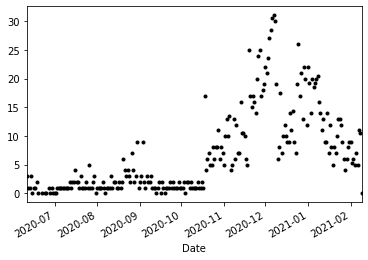

In [11]:
series.plot(style='k.')
pyplot.show()

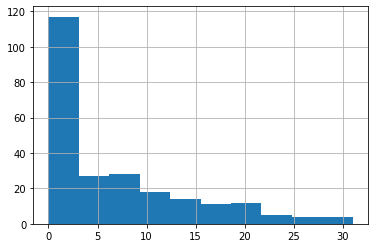

In [12]:
# create a histogram plot
series.hist()
pyplot.show()

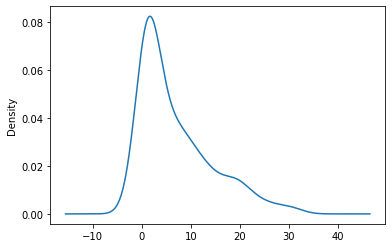

In [13]:
# create a density plot
series.plot(kind='kde')
pyplot.show()

6.5 Box and Whisker Plots by Interval

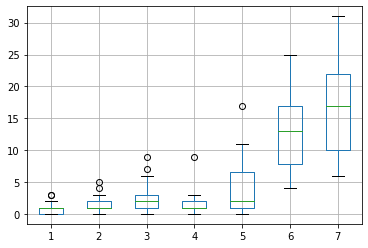

In [14]:
# create a boxplot of monthly data
from pandas import Grouper
from matplotlib import pyplot
from pandas import concat
one_year = series['2020']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,8)
months.boxplot()
pyplot.show()

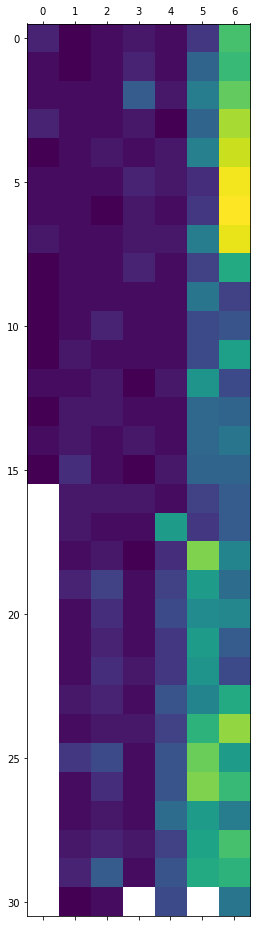

In [15]:
# create a heat map of monthly data
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()

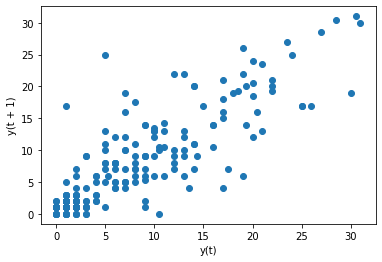

In [16]:
# create a scatter plot
from pandas.plotting import lag_plot
lag_plot(series)
pyplot.show()

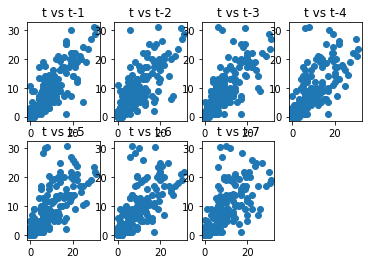

In [17]:
# create multiple scatter plots

values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
	ax = pyplot.subplot(240 + i)
	ax.set_title('t vs t-' + str(i))
	pyplot.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

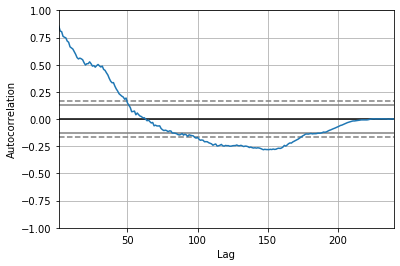

In [18]:
# create an autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

cycles of strong negative and positive correlation captures the relationship of an observation with past observations in the same and opposite seasons or times of year. Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

Resampling and Interpolation
The Pandas library provides a function called resample() on
the Series and DataFrame objects1. This can be used to group records when downsampling
and making space for new observations when upsampling.

In [19]:
# upsample to daily intervals
upsampled = series.resample('M').sum() #('15min').mean()
print(upsampled.head(32))

Date
2020-06-30     14.0
2020-07-31     46.0
2020-08-31     73.0
2020-09-30     50.0
2020-10-31    128.0
2020-11-30    390.5
2020-12-31    526.3
2021-01-31    376.6
2021-02-28     58.8
Freq: M, Name: kWh_th, dtype: float64


Date
2020-06-30     14.0
2020-07-31     46.0
2020-08-31     73.0
2020-09-30     50.0
2020-10-31    128.0
2020-11-30    390.5
2020-12-31    526.3
2021-01-31    376.6
2021-02-28     58.8
Freq: M, Name: kWh_th, dtype: float64


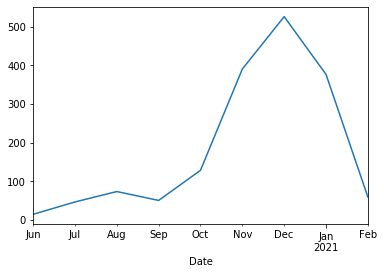

In [20]:
# upsample to daily intervals with linear interpolation
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

Date
2020-06-30     14.0
2020-07-31     46.0
2020-08-31     73.0
2020-09-30     50.0
2020-10-31    128.0
2020-11-30    390.5
2020-12-31    526.3
2021-01-31    376.6
2021-02-28     58.8
Freq: M, Name: kWh_th, dtype: float64


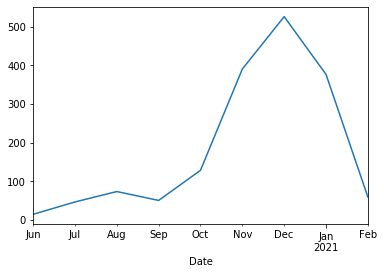

In [21]:
# upsample to daily intervals with spline interpolation
interpolated = upsampled.interpolate(method='spline', order=2)
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

Date
2020-06-30     0.875000
2020-09-30     1.836957
2020-12-31    11.356522
2021-03-31    10.885000
Freq: Q-DEC, Name: kWh_th, dtype: float64


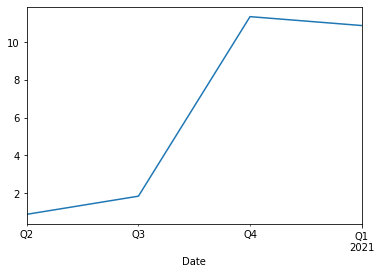

In [22]:
resample = series.resample('Q')
quarterly = resample.mean()
print(quarterly.head())
quarterly.plot()
pyplot.show()

Date
2020-06-30      14.0
2020-09-30     169.0
2020-12-31    1044.8
2021-03-31     435.4
Freq: Q-DEC, Name: kWh_th, dtype: float64


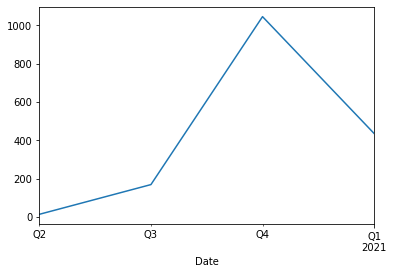

In [23]:
resample = series.resample('Q')
quarterly = resample.sum()
print(quarterly.head())
quarterly.plot()
pyplot.show()

Date
2020-12-31    1227.8
2021-12-31     435.4
Freq: A-DEC, Name: kWh_th, dtype: float64


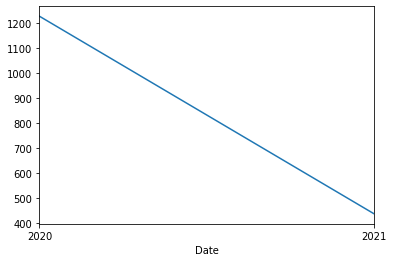

In [24]:
resample = series.resample('Y')
yearly = resample.sum()
print(yearly.head())
yearly.plot()
pyplot.show()

Power TransformsData transforms are intended to remove noise and improve the signal in time series forecasting.

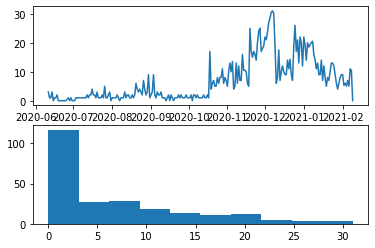

In [25]:
# load and plot a time series
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show()

Lambda: -0.063150


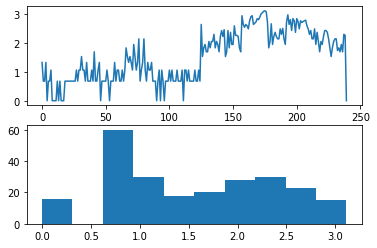

In [26]:
# automatically box-cox transform a time series
from scipy.stats import boxcox
dataframe = DataFrame(series.values)
dataframe.columns = ['kWh']
dataframe['kWh'] = dataframe['kWh'] + 1 # data must be possitive so values can't be zero
dataframe['kWh'], lam = boxcox(dataframe['kWh'])
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['kWh'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['kWh'])
pyplot.show()

##### Moving Average Smoothing

Date
2020-06-11    3.0
2020-06-12    1.0
2020-06-13    1.0
2020-06-14    3.0
2020-06-15    0.0
2020-06-16    1.0
2020-06-17    1.0
2020-06-18    2.0
2020-06-19    0.0
2020-06-22    0.0
Name: kWh_th, dtype: float64
Date
2020-06-11         NaN
2020-06-12         NaN
2020-06-13         NaN
2020-06-14         NaN
2020-06-15         NaN
2020-06-16         NaN
2020-06-17    1.428571
2020-06-18    1.285714
2020-06-19    1.142857
2020-06-22    1.000000
Name: kWh_th, dtype: float64


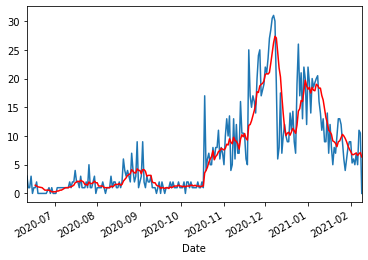

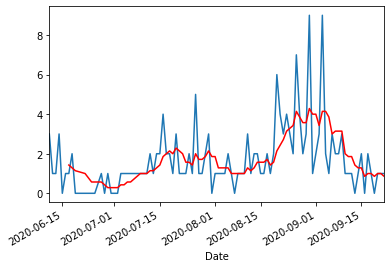

In [27]:
# moving average smoothing as data preparation
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
print(series.head(10))
# tail-rolling average transform
rolling = series.rolling(window=7) # adjust window size here
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
pyplot.show()
# zoomed plot original and transformed dataset
series[:100].plot()
rolling_mean[:100].plot(color='red')
pyplot.show()

In [28]:
# moving average smoothing as feature engineering
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
print(series.head(20))
df = DataFrame(series.values)
width = 7
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't', 't+1']
print(dataframe.head(20))

Date
2020-06-11    3.0
2020-06-12    1.0
2020-06-13    1.0
2020-06-14    3.0
2020-06-15    0.0
2020-06-16    1.0
2020-06-17    1.0
2020-06-18    2.0
2020-06-19    0.0
2020-06-22    0.0
2020-06-24    0.0
2020-06-25    0.0
2020-06-27    1.0
2020-06-28    0.0
2020-06-29    1.0
2020-06-30    0.0
2020-07-01    0.0
2020-07-02    0.0
2020-07-03    1.0
2020-07-04    1.0
Name: kWh_th, dtype: float64
        mean    t  t+1
0        NaN  NaN  3.0
1        NaN  3.0  1.0
2        NaN  1.0  1.0
3        NaN  1.0  3.0
4        NaN  3.0  0.0
5        NaN  0.0  1.0
6        NaN  1.0  1.0
7        NaN  1.0  2.0
8        NaN  2.0  0.0
9        NaN  0.0  0.0
10       NaN  0.0  0.0
11       NaN  0.0  0.0
12  1.428571  0.0  1.0
13  1.285714  1.0  0.0
14  1.142857  0.0  1.0
15  1.000000  1.0  0.0
16  0.571429  0.0  0.0
17  0.571429  0.0  0.0
18  0.571429  0.0  1.0
19  0.428571  1.0  1.0


predicted=1.666667, expected=3.000000
predicted=1.666667, expected=0.000000
predicted=1.333333, expected=1.000000
predicted=1.333333, expected=1.000000
predicted=0.666667, expected=2.000000
predicted=1.333333, expected=0.000000
predicted=1.000000, expected=0.000000
predicted=0.666667, expected=0.000000
predicted=0.000000, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.333333, expected=0.000000
predicted=0.333333, expected=1.000000
predicted=0.666667, expected=0.000000
predicted=0.333333, expected=0.000000
predicted=0.333333, expected=0.000000
predicted=0.000000, expected=1.000000
predicted=0.333333, expected=1.000000
predicted=0.666667, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=1.000000
predicted=1.000000, expected=2.000000
predicted=1.333333, expected=1.000000
predicted=1.

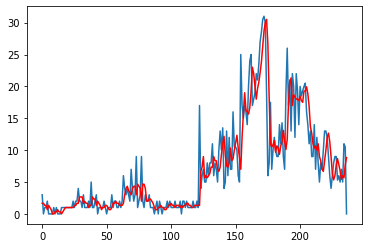

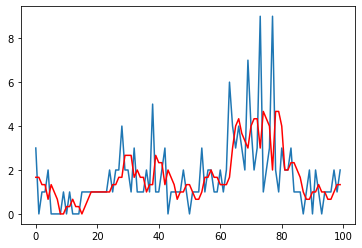

In [29]:
# moving average smoothing as a forecast model
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[:100])
pyplot.plot(predictions[:100], color='red')
pyplot.show()

In [30]:
# calculate the stationarity of a random walk

from statsmodels.tsa.stattools import adfuller
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.786310
p-value: 0.387279
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.573


The null hypothesis of the test is that the time series is non-stationary. Running the example,
we can see that the test statistic value was -1.786310. This is larger than all of the critical values
at the 1%, 5%, and 10% confidence levels. Therefore, we can say that the time series does
appear to be non-stationary with a low likelihood of the result being a statistical fluke.

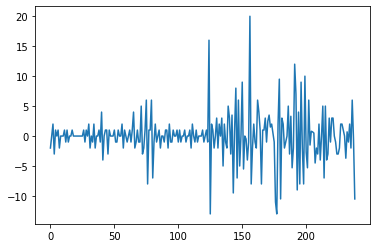

In [31]:
# take difference (could be used for meter difference but would need to bring into dataframe?)
diff = list()
for i in range(1, len(series)):
	value = series[i] - series[i - 1]
	diff.append(value)
# line plot
pyplot.plot(diff)
pyplot.show()

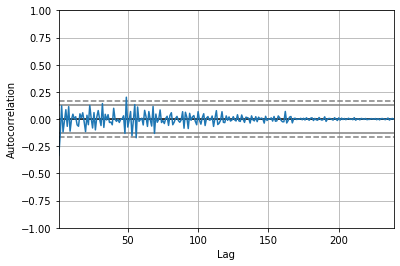

In [32]:
# plot the autocorrelation
# take difference
# line plot
autocorrelation_plot(diff)
pyplot.show()

Running the example, we can see no signicant relationship between the lagged observations,
as we would expect from the way the random walk was generated. All correlations are small,
close to zero and below the 95% and 99% condence levels (beyond a few statistical 
ukes).

In [33]:
# persistence forecast

from sklearn.metrics import mean_squared_error
from math import sqrt

# prepare dataset
train_size = int(len(series) * 0.66)
train, test = series[0:train_size], series[train_size:]
# persistence
predictions = list()
history = train[-1]
for i in range(len(test)):
	yhat = history
	predictions.append(yhat)
	history = test[i]
rmse = sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE: %.3f' % rmse)

Persistence RMSE: 4.822


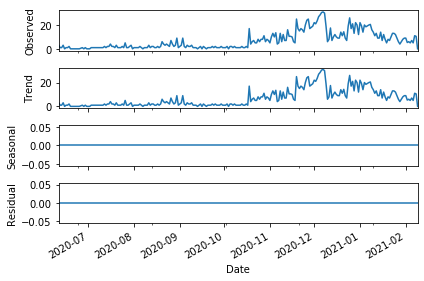

In [34]:
# additive decompose additive time series
from statsmodels.tsa.seasonal import seasonal_decompose
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
result = seasonal_decompose(series, model='additive', freq=1)
result.plot()
pyplot.show()

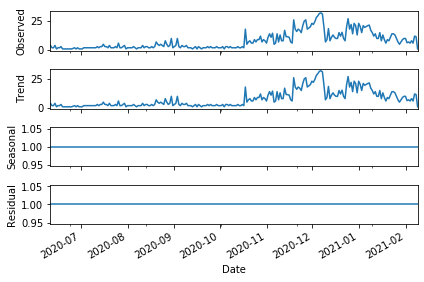

In [35]:
# multiplicative decompose multiplicative time series
result = seasonal_decompose(series+1, model='multiplicative', freq=1) #+1 as can't have zero values
result.plot()
pyplot.show()

Date
2020-06-11     3.0
2020-06-12     1.0
2020-06-13     1.0
2020-06-14     3.0
2020-06-15     0.0
              ... 
2021-02-05     7.0
2021-02-06     5.0
2021-02-07    11.0
2021-02-08    10.5
2021-02-09     0.0
Name: kWh_th, Length: 240, dtype: float64


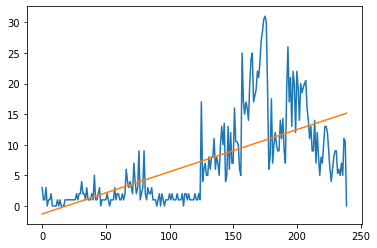

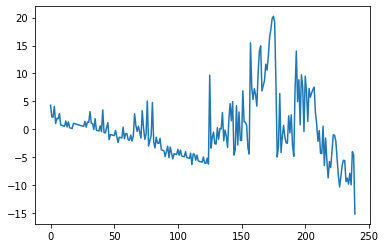

In [36]:
# use a linear model to detrend a time series
from pandas import read_csv
from pandas import datetime
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy

series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
print(series)
# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()

Coefficients: [-1.26893621e-07  4.90798734e-05 -5.25619083e-03  1.88683557e-01
 -2.12310974e-01]


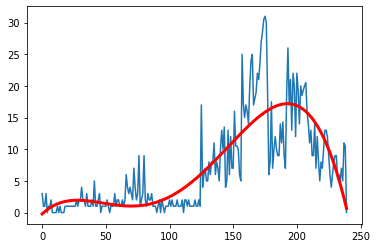

In [37]:
# model seasonality with a polynomial model
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
	value = coef[-1]
	for d in range(degree):
		value += X[i]**(degree-d) * coef[d]
	curve.append(value)
# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

In [38]:
# calculate stationarity test of time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.786310
p-value: 0.387279
Critical Values:
	1%: -3.459
	5%: -2.874
	10%: -2.573


In [39]:
# non-stationary = time dependent structure

In [44]:
# calculate stationarity test of log transformed time series data
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
from numpy import log
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
X = series.values
X = log(X+1) # had to add a +1 to avoid devide by zero error
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.429187
p-value: 0.568206
	1%: -3.459
	5%: -2.874
	10%: -2.573


Observations: 240
Training Observations: 158
Testing Observations: 82


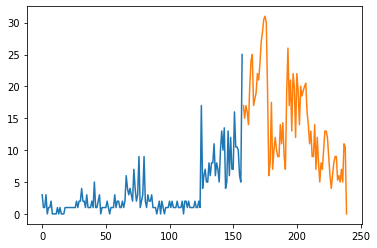

In [45]:
# plot train-test split of time series data
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
print('Observations: %d' % (len(X)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))
pyplot.plot(train)
pyplot.plot([None for i in train] + [x for x in test])
pyplot.show()

Observations: 120
Training Observations: 60
Testing Observations: 60
Observations: 180
Training Observations: 120
Testing Observations: 60
Observations: 240
Training Observations: 180
Testing Observations: 60


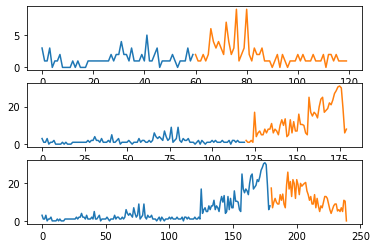

In [46]:
# calculate repeated train-test splits of time series data
from pandas import read_csv
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
X = series.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
	train = X[train_index]
	test = X[test_index]
	print('Observations: %d' % (len(train) + len(test)))
	print('Training Observations: %d' % (len(train)))
	print('Testing Observations: %d' % (len(test)))
	pyplot.subplot(310 + index)
	pyplot.plot(train)
	pyplot.plot([None for i in train] + [x for x in test])
	index += 1
pyplot.show()

     t  t+1
0  NaN  3.0
1  3.0  1.0
2  1.0  1.0
3  1.0  3.0
4  3.0  0.0
Test RMSE: 4.822


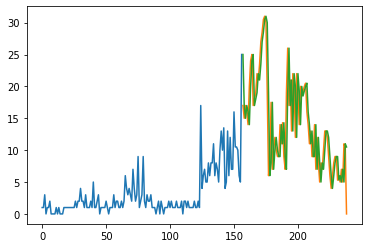

In [47]:
# evaluate a persistence forecast model
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
print(dataframe.head(5))
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
def model_persistence(x):
	return x
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

In [50]:
# correlation of lag=1
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
print(result)


           t      t+1
t    1.00000  0.85661
t+1  0.85661  1.00000


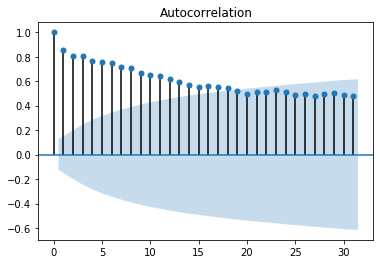

In [54]:
# autocorrelation plot of time series
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
plot_acf(series, lags=31)
pyplot.show()

Test RMSE: 4.721


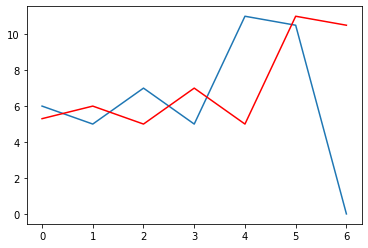

In [55]:
# develop a model to predict the last 7 days
# evaluate a persistence model
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
def model_persistence(x):
	return x
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predictions vs expected
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

Lag: 15
Coefficients: [ 0.54430002  0.52690176  0.09380044  0.21911655 -0.06317482  0.04798137
  0.13306338 -0.0473888   0.1147904  -0.15514615  0.07792352  0.03856533
  0.02247115 -0.03144771 -0.09840197  0.05475703]
predicted=6.360404, expected=6.000000
predicted=7.244651, expected=5.000000
predicted=6.737844, expected=7.000000
predicted=7.095134, expected=5.000000
predicted=6.913745, expected=11.000000
predicted=6.251864, expected=10.500000
predicted=6.722958, expected=0.000000
Test RMSE: 3.577


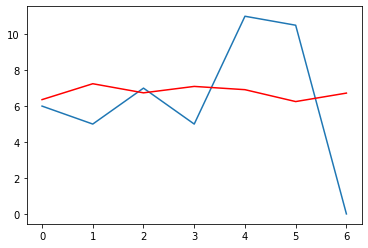

In [56]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=6.360404, expected=6.000000
predicted=7.054753, expected=5.000000
predicted=5.521327, expected=7.000000
predicted=6.943745, expected=5.000000
predicted=5.365334, expected=11.000000
predicted=8.390350, expected=10.500000
predicted=8.713302, expected=0.000000
Test RMSE: 4.182


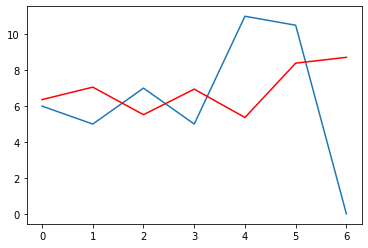

In [60]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
# split dataset
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [61]:
# calculate residual errors for a persistence forecast model
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
predictions = [x for x in test_X]
# skill of persistence model
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# calculate residuals
residuals = [test_y[i]-predictions[i] for i in range(len(predictions))]
residuals = DataFrame(residuals)
print(residuals.head())

Test RMSE: 4.822
     0
0 -8.0
1 -2.0
2  2.0
3 -1.0
4 -2.0


predicted error=-15.054787, expected error=-8.000000
predicted error=-6.432656, expected error=-2.000000
predicted error=-2.289267, expected error=2.000000
predicted error=-4.909680, expected error=-1.000000
predicted error=-1.261488, expected error=-2.000000
predicted error=5.257222, expected error=6.000000
predicted error=-5.534357, expected error=4.000000
predicted error=-8.059111, expected error=1.000000
predicted error=-6.632197, expected error=-8.000000
predicted error=5.316217, expected error=1.000000
predicted error=6.692461, expected error=1.000000
predicted error=3.608920, expected error=3.000000
predicted error=-1.463493, expected error=-1.000000
predicted error=0.043991, expected error=2.500000
predicted error=-3.195498, expected error=3.500000
predicted error=-5.088673, expected error=1.500000
predicted error=-4.376905, expected error=2.000000
predicted error=-4.602656, expected error=0.500000
predicted error=-6.957581, expected error=-1.000000
predicted error=-5.548235, e

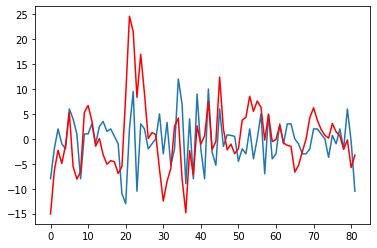

In [62]:
# forecast residual forecast error
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
from matplotlib import pyplot
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
	# persistence
	yhat = test_X[t]
	error = test_y[t] - yhat
	expected_error.append(error)
	# predict error
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	pred_error = coef[0]
	for d in range(window):
		pred_error += coef[d+1] * lag[window-d-1]
	predictions.append(pred_error)
	history.append(error)
	print('predicted error=%f, expected error=%f' % (pred_error, error))
# plot predicted error
pyplot.plot(expected_error)
pyplot.plot(predictions, color='red')
pyplot.show()

predicted=9.945213, expected=17.000000
predicted=10.567344, expected=15.000000
predicted=12.710733, expected=17.000000
predicted=12.090320, expected=16.000000
predicted=14.738512, expected=14.000000
predicted=19.257222, expected=20.000000
predicted=14.465643, expected=24.000000
predicted=15.940889, expected=25.000000
predicted=18.367803, expected=17.000000
predicted=22.316217, expected=18.000000
predicted=24.692461, expected=19.000000
predicted=22.608920, expected=22.000000
predicted=20.536507, expected=21.000000
predicted=21.043991, expected=23.500000
predicted=20.304502, expected=27.000000
predicted=21.911327, expected=28.500000
predicted=24.123095, expected=30.500000
predicted=25.897344, expected=31.000000
predicted=24.042419, expected=30.000000
predicted=24.451765, expected=19.000000
predicted=27.625362, expected=6.000000
predicted=30.594830, expected=8.000000
predicted=29.543698, expected=17.500000
predicted=25.832585, expected=7.000000
predicted=23.949366, expected=10.000000
pred

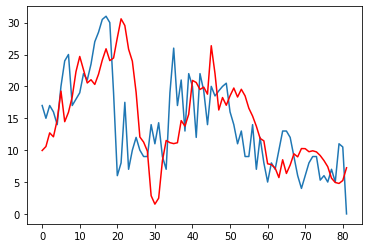

In [63]:
# correct forecasts with a model of forecast residual errors
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from statsmodels.tsa.ar_model import AR
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
# create lagged dataset
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t', 't+1']
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_y)):
	# persistence
	yhat = test_X[t]
	error = test_y[t] - yhat
	# predict error
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	pred_error = coef[0]
	for d in range(window):
		pred_error += coef[d+1] * lag[window-d-1]
	# correct the prediction
	yhat = yhat + pred_error
	predictions.append(yhat)
	history.append(error)
	print('predicted=%f, expected=%f' % (yhat, test_y[t]))
# error
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %.3f' % rmse)
# plot predicted error
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()

C:\Users\Paul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Paul\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.kWh_th   No. Observations:                  239
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -635.804
Method:                       css-mle   S.D. of innovations              3.457
Date:                Sun, 21 Mar 2021   AIC                           1285.609
Time:                        22:22:26   BIC                           1309.944
Sample:                             1   HQIC                          1295.415
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0135      0.098      0.139      0.890      -0.178       0.205
ar.L1.D.kWh_th    -0.4778      0.065     -7.343      0.000      -0.605      -0.350
ar.L2.D.kWh_th    -0.3682      0.071

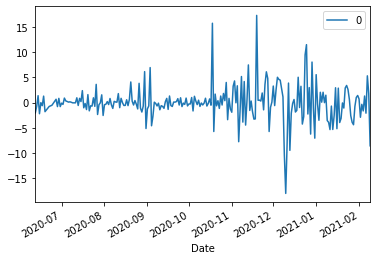

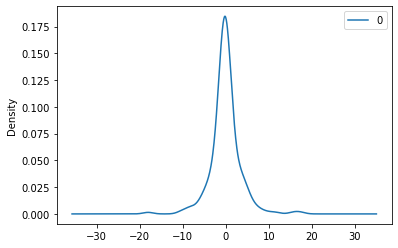

                0
count  239.000000
mean    -0.007668
std      3.464838
min    -18.012792
25%     -1.129659
50%     -0.095335
75%      0.967907
max     17.327829


In [66]:
# fit an ARIMA model and plot residual errors
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
# load dataset
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=9.747952, expected=17.000000
predicted=11.001118, expected=15.000000
predicted=13.218796, expected=17.000000
predicted=11.491079, expected=16.000000
predicted=14.078295, expected=14.000000
predicted=18.976667, expected=20.000000
predicted=17.068666, expected=24.000000
predicted=17.771840, expected=25.000000
predicted=20.507119, expected=17.000000
predicted=19.055858, expected=18.000000
predicted=18.961911, expected=19.000000
predicted=20.243520, expected=22.000000
predicted=22.103670, expected=21.000000
predicted=21.653326, expected=23.500000
predicted=20.406848, expected=27.000000
predicted=22.110911, expected=28.500000
predicted=24.137774, expected=30.500000
predicted=26.691394, expected=31.000000
predicted=27.723733, expected=30.000000
predicted=28.907103, expected=19.000000
predicted=26.307493, expected=6.000000
predicted=18.075147, expected=8.000000
predicted=14.712732, expected=17.500000
predicted=20.295730, expected=7.000000
predicted=12.998947, expected=10.000000
pred

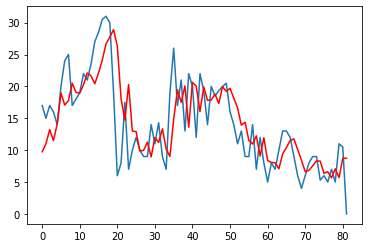

In [67]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = read_csv('DFS04690650.csv', header=0, index_col=0, parse_dates=True, squeeze=True, dayfirst=True)
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()